# Se a vida te der laranjas...

## 1. Introdução

Este trabalho tem como objetivo analisar o *dataset* Orange Quality, buscando entender as interações e relações entre as diferentes variáveis presentes no conjunto de dados. A principal abordagem será investigar como as variáveis independentes influenciam a variável dependente, **Quality**. Por meio dessa análise, pretende-se identificar padrões e insights que possam ser úteis para a compreensão do comportamento dos dados e para a tomada de decisões mais informadas.


## 2. Descrição dos dados

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from IPython.display import Markdown as md
from IPython.core.display import HTML


oranges = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/orange_quality.csv')
oranges.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [10]:
oranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


Para melhor entender cada aspecto desse conjunto de dados, será criado um dicionário que classifica e define cada variável utilizada.

In [11]:
oranges_dictionary = pd.DataFrame([
    {
        'variavel': 'Size (cm)',
        'descrição': 'Tamanho da laranja em centímetros',
        'tipo': 'quantitativa',
        'subtipo': 'continua',
    },
    {
        'variavel': 'Weight (g)',
        'descrição': 'Peso da laranja em gramas',
        'tipo': 'quantitativa',
        'subtipo': 'continua',
    },
    {
        'variavel': 'Brix (Sweetness)',
        'descrição': 'Gramas de açúcar a cada 100 gramas de solução',
        'tipo': 'quantitativa',
        'subtipo': 'continua',

    },

    {
        'variavel': 'pH (Acidity)',
        'descrição': 'Nivel de acidez',
        'tipo': 'quantitativa',
        'subtipo': 'continua',

    },

    {
        'variavel': 'Softness (1-5)',
        'descrição': 'Maciez',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',

    },
 {
        'variavel': 'HarvestTime (days)',
        'descrição': 'Tempo em dias decorrido após a colheita',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',

    },
{
        'variavel': 'Ripeness (1-5)',
        'descrição': 'Escala de maturação',
        'tipo': 'quantitativa',
        'subtipo': 'discreta',

    },
{
        'variavel': 'Color',
        'descrição': 'Coloração da laranja',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',

    },
{
        'variavel': 'Variety',
        'descrição': 'Tipo da laranja',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',

    },
    {
        'variavel': 'Blemishes (Y/N)',
        'descrição': 'Se a laranja possui manchas',
        'tipo': 'qualitativa',
        'subtipo': 'nominal',

    },
 {
        'variavel': 'Quality (1-5)',
        'descrição': 'Qualidade da laranja',
        'tipo': 'quantitativa',
        'subtipo': 'continua',

    }
])

## 3. Análise univariada


### 3.1. Variáveis qualitativas nominais




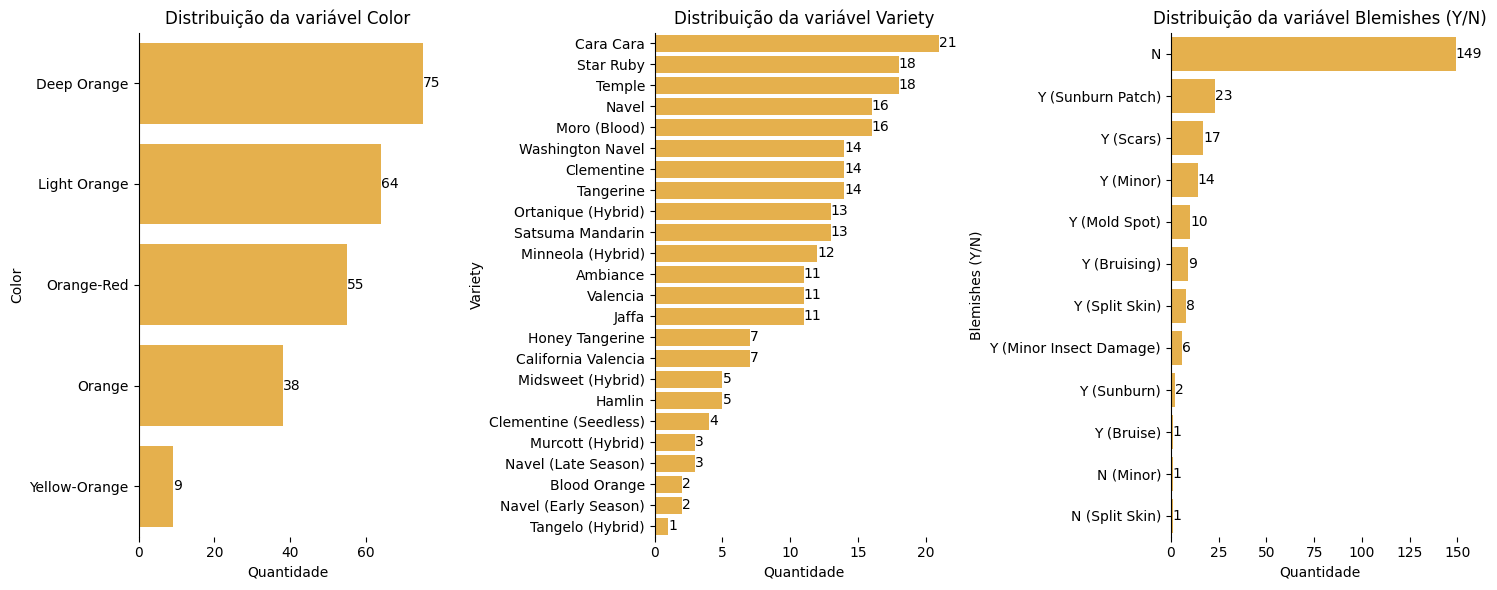

In [26]:
variaveis_qualitativas = oranges_dictionary.query("tipo == 'qualitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(15, 6), ncols = 3, nrows = 1)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = oranges[variavel].value_counts().index
    # Criar a figura
    ax = sns.countplot(oranges, y=variavel, ax=axes[i], order=order, alpha=.8, color = "orange")
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge")
    ax.set(title=f"Distribuição da variável {variavel}", xlabel = "Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()